# End-to-End Data Science Project: Clustering the Iris Dataset

## Project Objective
The goal is to cluster iris flowers based on their sepal and petal measurements using the Iris dataset. We'll identify distinct groups (clusters) of flowers and validate their separability.

## Step 1: Problem Definition
**Objective**: 
Cluster the flowers into groups using an unsupervised learning algorithm (K-Means) and evaluate the cluster performance using techniques such as the elbow method and silhouette scores.

## Step 2: Data Collection
The Iris dataset is available in the sklearn.datasets module. It contains:

4 features: Sepal length, Sepal width, Petal length, Petal width
150 observations (50 samples for each of the three species).

## Step 3: Import Libraries and Load the Dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

## Step 4: Exploratory Data Analysis (EDA)
### 4.1 Inspect the Data

In [2]:
# Quick overview
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
df.duplicated().sum()

1

We can see that there is a single Duplicate value which we need to deal with.

### Checking for Outliers

In [7]:
from scipy.stats import zscore

# Automatically select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Z-scores for all numeric columns
z_scores = df[numeric_cols].apply(zscore)

# Identify outliers in each column
outliers = (z_scores.abs() > 3).sum()

# Print the number of outliers per column
print("Outliers per column:")
print(outliers)

Outliers per column:
sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [8]:
# Automatically select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize a dictionary to store the outlier counts
outlier_counts = {}

# Loop through each numeric column
for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Store the count of outliers for the column
    outlier_counts[col] = outliers.shape[0]

# Print the number of outliers per column
print("Outliers per column (IQR Method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outliers per column (IQR Method):
sepal length (cm): 0
sepal width (cm): 4
petal length (cm): 0
petal width (cm): 0
species: 0


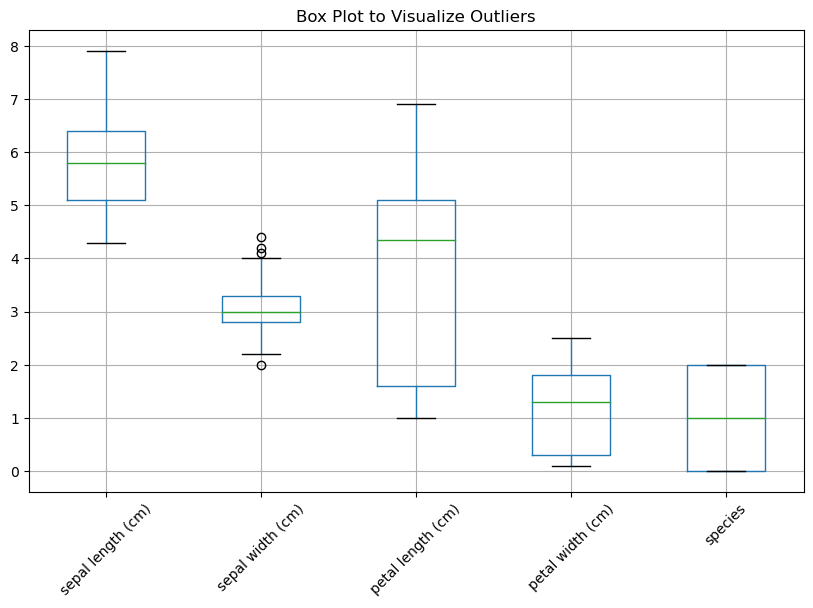

In [9]:
# Box plot for each numeric column
df[numeric_cols].boxplot(figsize=(10, 6))
plt.title("Box Plot to Visualize Outliers")
plt.xticks(rotation=45)
plt.show()

From the above check for outliers we can see that there are atleast 4 outliers in the `sepal width (cm)` feature and non in other features.

### 4.2 Visualize Pairwise Relationships

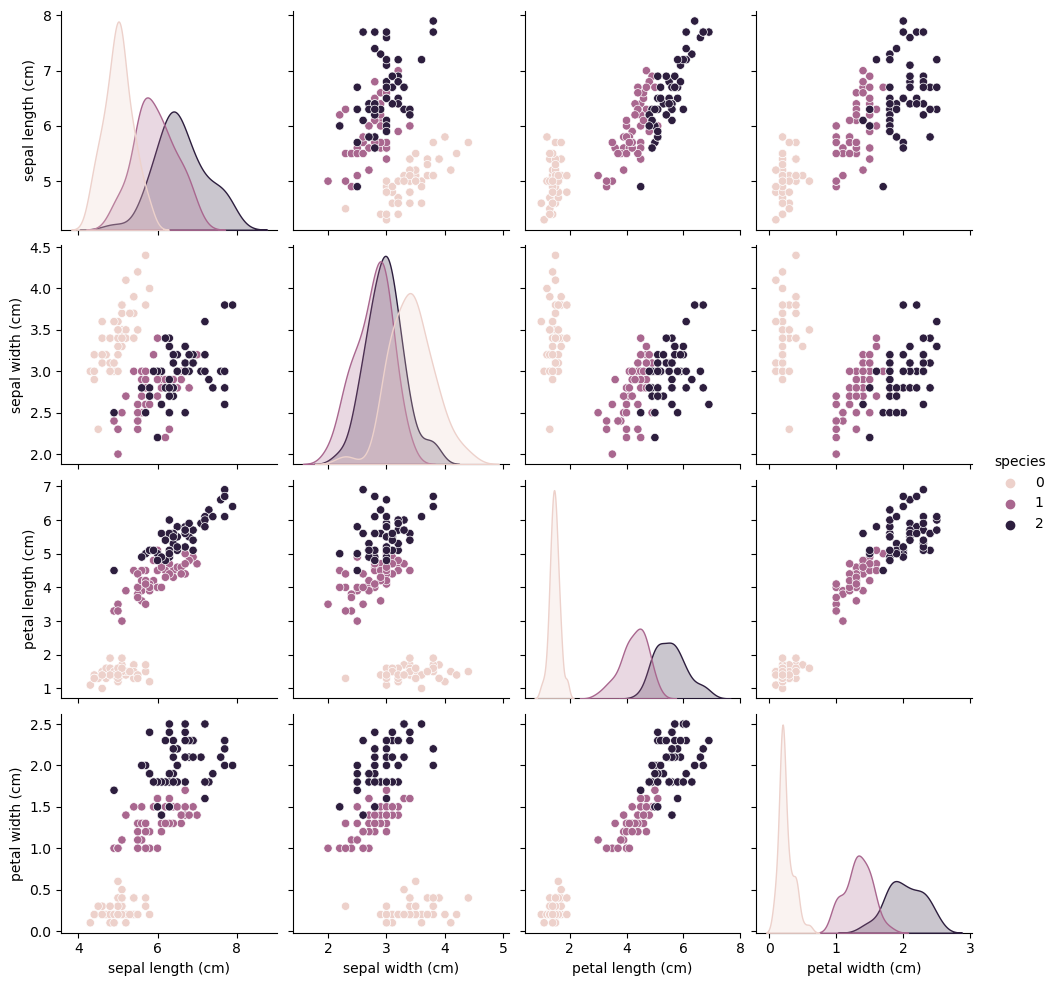

In [10]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

### 4.3 Correlation Analysis

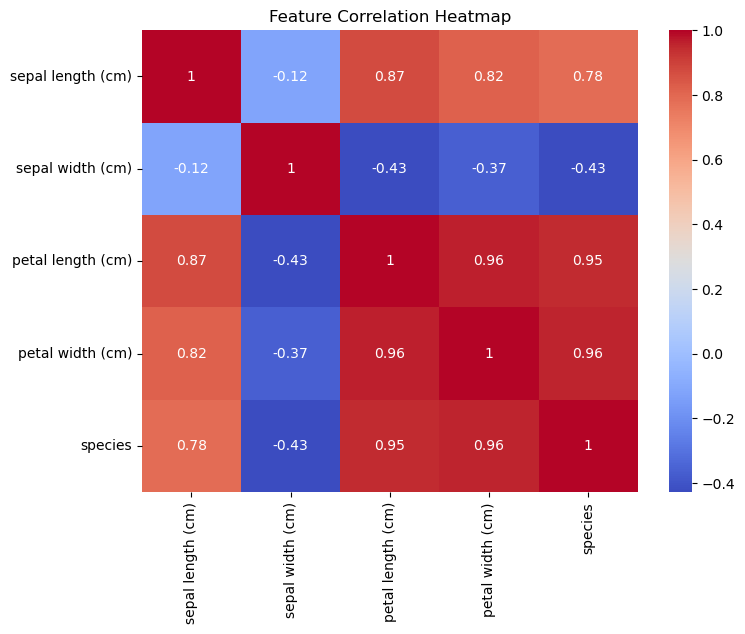

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 5: Data Cleaning
Outliers, Duplicates values

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 5.1 Addressing Duplicates values

In [13]:
df.shape

(150, 5)

In [14]:
df_new = df.drop_duplicates()
df_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df_new.shape

(149, 5)

df_new.shape
### 5.2 Addressing Outliers

In [16]:
# Define Q1, Q3, and IQR for sepal width (cm)
Q1 = df_new['sepal width (cm)'].quantile(0.25)
Q3 = df_new['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Locate rows with outliers
outliers = df_new[(df_new['sepal width (cm)'] < lower_bound) | (df_new['sepal width (cm)'] > upper_bound)]
print("Outliers in sepal width (cm):")
outliers

Outliers in sepal width (cm):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [17]:
# Remove rows with outliers
df_cleaned = df_new[(df_new['sepal width (cm)'] >= lower_bound) & (df_new['sepal width (cm)'] <= upper_bound)]
print("Dataset after removing outliers:")
df_cleaned.head()

Dataset after removing outliers:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df_cleaned.shape

(145, 5)

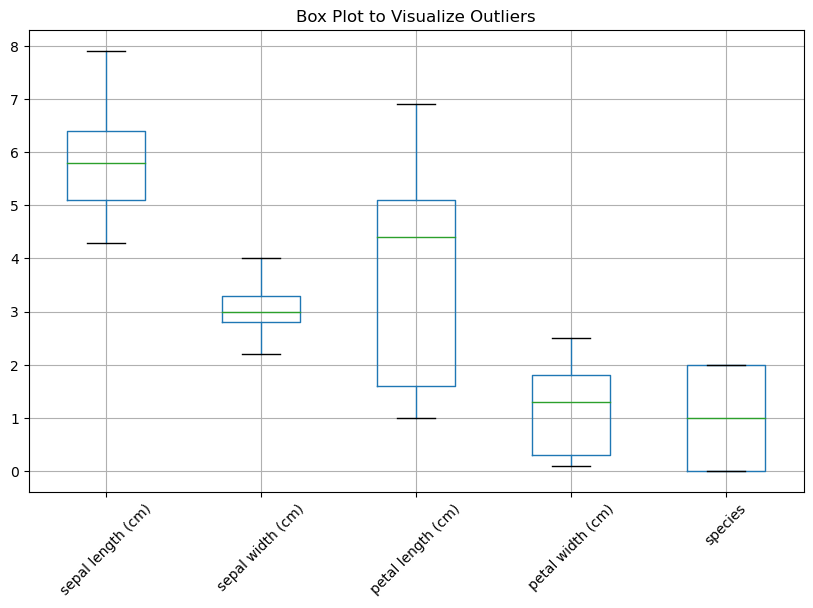

In [19]:
# Box plot for each numeric column
df_cleaned[numeric_cols].boxplot(figsize=(10, 6))
plt.title("Box Plot to Visualize Outliers")
plt.xticks(rotation=45)
plt.show()

The outliers has been handled.

## Step 6: Data Preprocessing
### 6.1 Remove Target Variable (Unsupervised Problem)

In [20]:
X = df_cleaned.drop(columns='species')

### 6.2 Standardize the Features
K-Means is sensitive to the scale of features. We'll standardize them to have a mean of 0 and standard deviation of 1.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 7: Clustering
### 6.1 Elbow Method to Find Optimal 𝑘

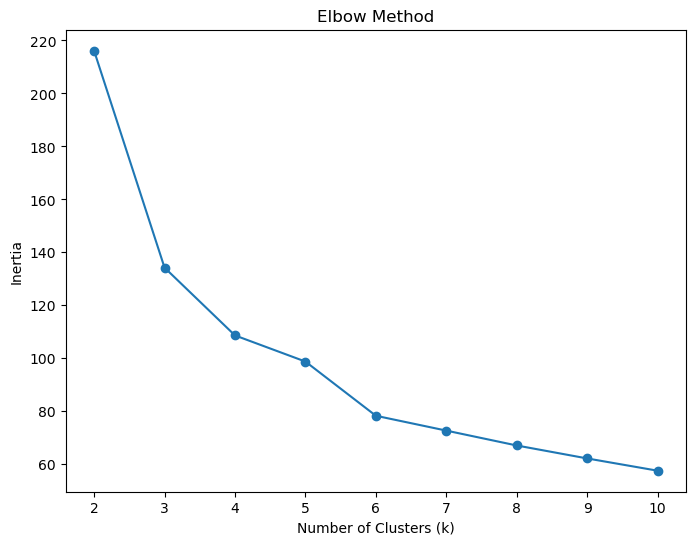

In [22]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

### 6.2 Silhoutte method

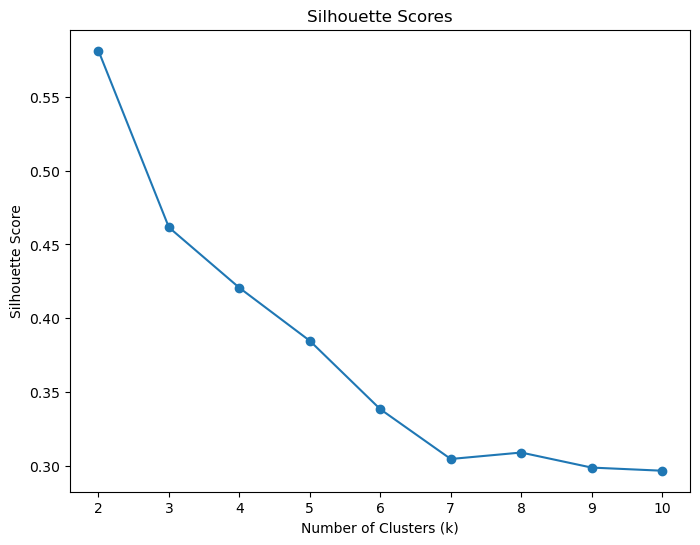

In [23]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

From the 2 Metrics for determining optimum K above we can see that optimum K = 3

## Step 7: Final Clustering

In [24]:
# Make an explicit copy of the cleaned DataFrame to avoid warnings
df_cleaned = df_cleaned.copy()

# Fit K-Means with optimal clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Check the cleaned dataset with cluster labels
df_cleaned.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


## Step 8: Analyze and Visualize Clusters
## 8.1 Centroids and Cluster Size

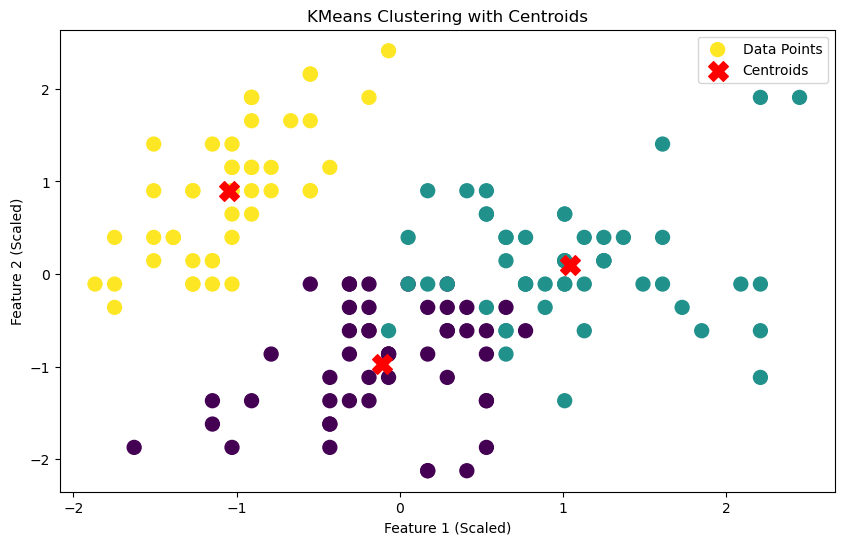

Cluster Centers (Scaled):
[[-0.10609463 -0.96871589  0.26593872  0.18263344]
 [ 1.04096625  0.099774    0.94875461  0.98368179]
 [-1.04340731  0.90021498 -1.32938138 -1.28117775]]

Cluster Distribution:
1    51
0    48
2    46
Name: cluster, dtype: int64


In [25]:
# Cluster labels and centroids from the KMeans model
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=100, label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Add plot titles and labels
plt.title("KMeans Clustering with Centroids")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()

# Show the plot
plt.show()

# Print the cluster centroids
print("Cluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# Print cluster counts
print("\nCluster Distribution:")
print(df_cleaned['cluster'].value_counts())

## Step 9: Model Evaluation
Use silhouette scores to evaluate cluster compactness and separation.
Compare the clusters with the original species labels using confusion matrix or adjusted Rand index (if labels are available).

In [26]:
from sklearn.metrics import adjusted_rand_score

# Compare clusters with original species labels
ari_score = adjusted_rand_score(df_cleaned['species'], df_cleaned['cluster'])
print(f'Adjusted Rand Index (ARI): {ari_score}')

Adjusted Rand Index (ARI): 0.6171329364411502


In [27]:
silhouette_avg = silhouette_score(X_scaled, df_cleaned['cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg}')

Silhouette Score for Hierarchical Clustering: 0.4615595942122948


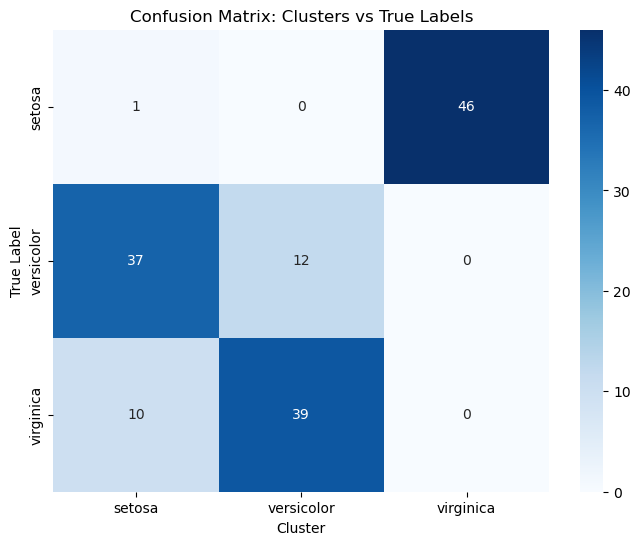

In [28]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix between clusters and original species labels
conf_matrix = confusion_matrix(df_cleaned['species'], df_cleaned['cluster'])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Clusters vs True Labels')
plt.show()

## Hierarchical Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Perform Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='single')
df_cleaned['hierarchical_cluster'] = hierarchical_model.fit_predict(X_scaled)

### Evaluate Hierarchical clustering
ARI & Silhouette score

Silhouette Score for Hierarchical Clustering: 0.5145768844932492
Adjusted Rand Index (ARI) for Hierarchical Clustering: 0.5480609987129652


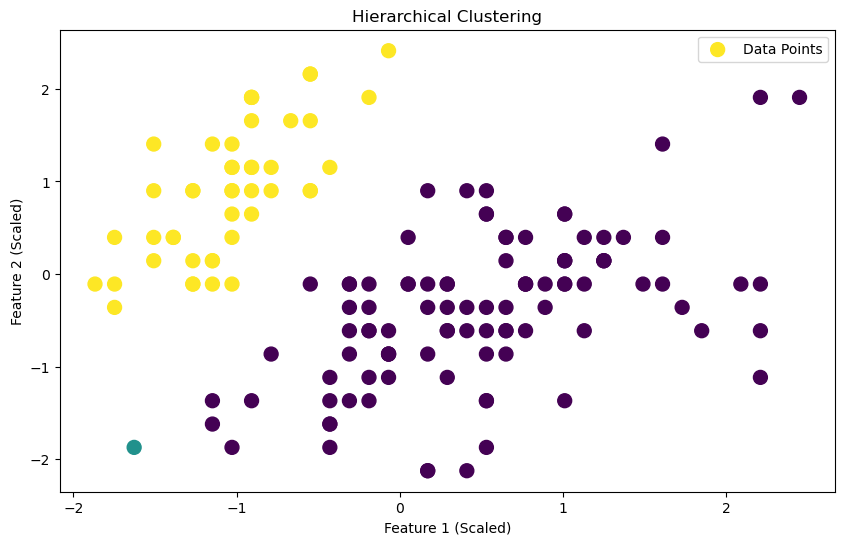

In [30]:
# Calculate silhouette score for Hierarchical Clustering
silhouette_avg_hc = silhouette_score(X_scaled, df_cleaned['hierarchical_cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hc}")

# Compare Hierarchical Clustering with species labels using Adjusted Rand Index
ari_score_hc = adjusted_rand_score(df_cleaned['species'], df_cleaned['hierarchical_cluster'])
print(f"Adjusted Rand Index (ARI) for Hierarchical Clustering: {ari_score_hc}")

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))

# Scatter plot for Hierarchical Clustering
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=df_cleaned['hierarchical_cluster'],
    cmap='viridis',
    s=100,
    label='Data Points',
)

# Add titles and labels
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()

# Show the plot
plt.show()

In [31]:
# Check the clusters assigned by hierarchical clustering
df_cleaned[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'hierarchical_cluster']].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),hierarchical_cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


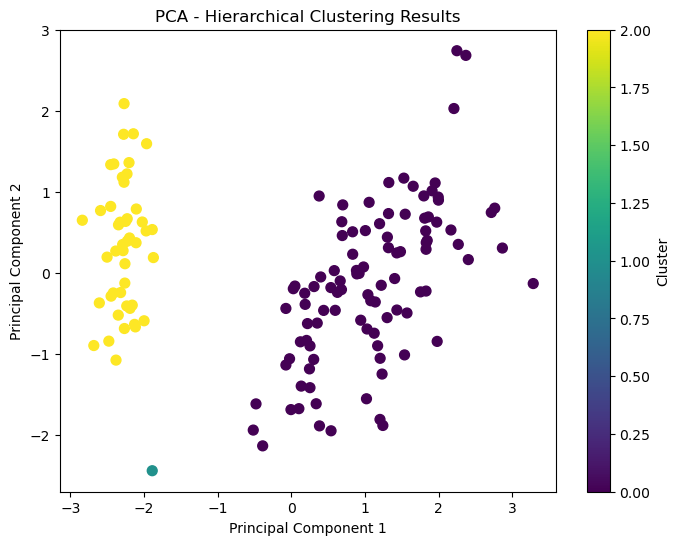

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned['hierarchical_cluster'], cmap='viridis', s=50)
plt.title('PCA - Hierarchical Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

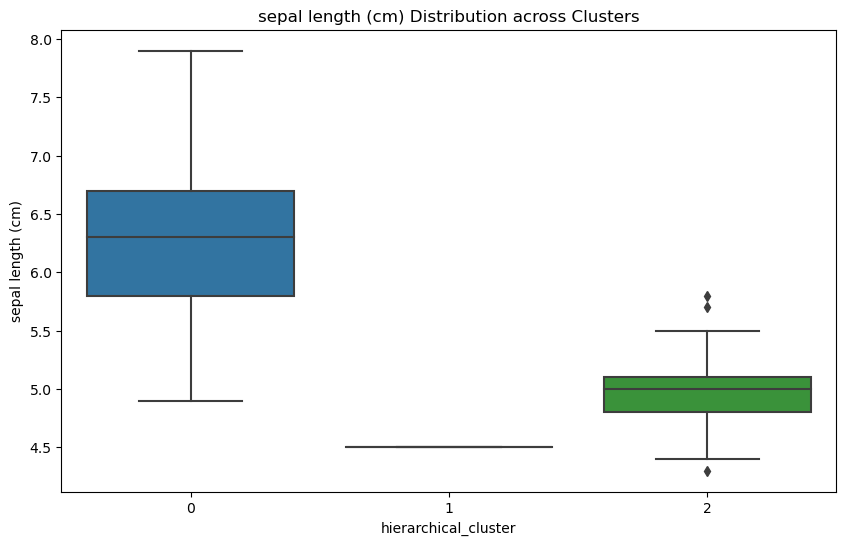

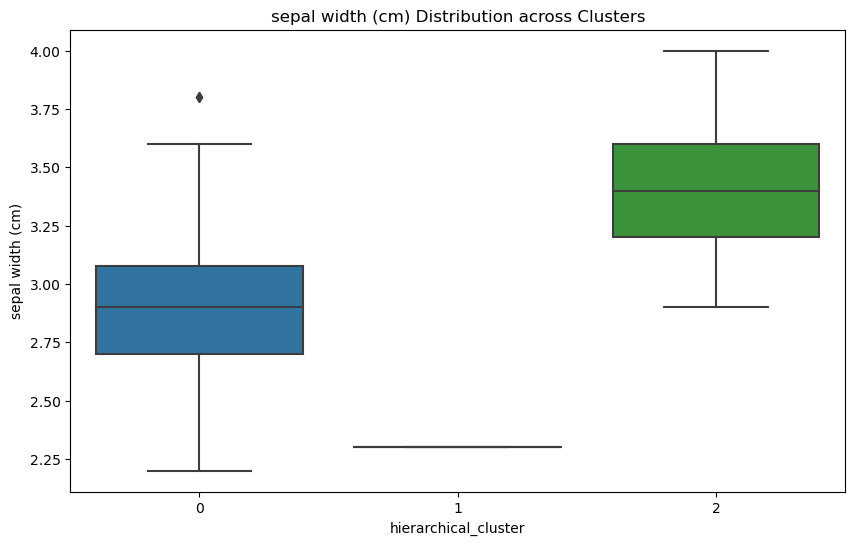

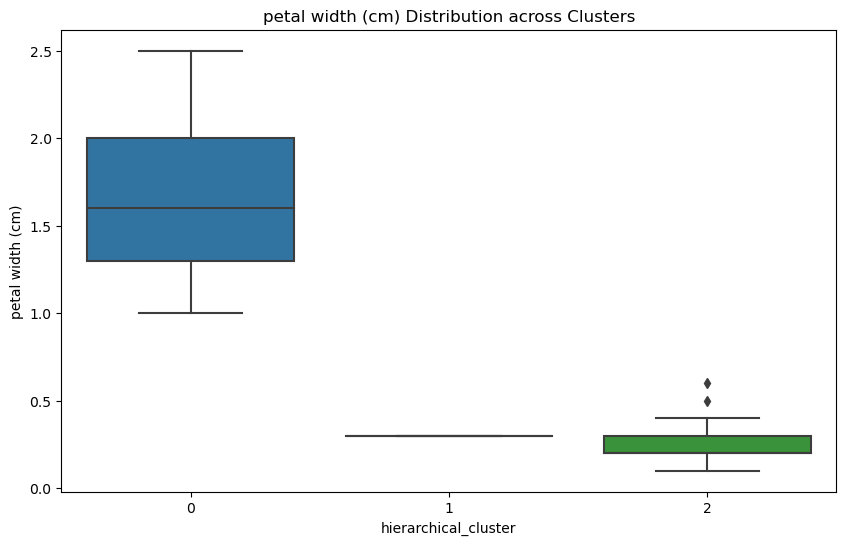

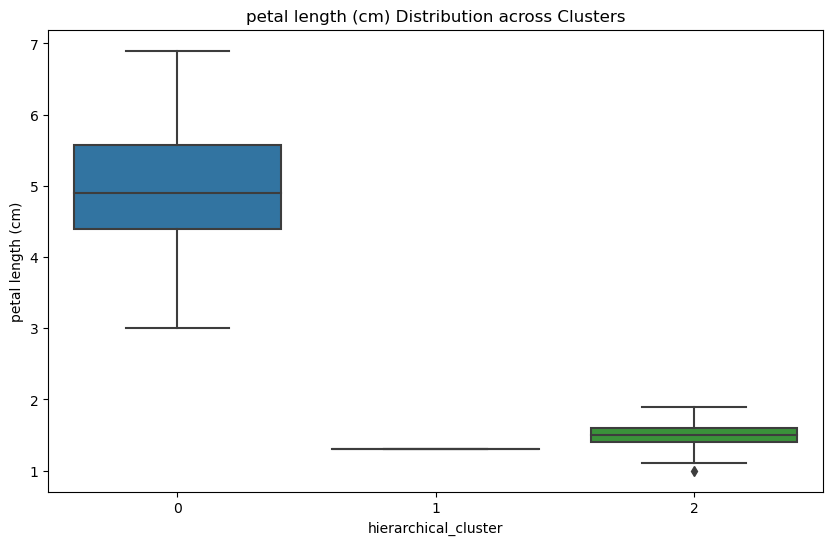

In [ ]:
# List of features to plot
features = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'petal length (cm)']

# Plot feature distributions across clusters
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='hierarchical_cluster', y=feature, data=df_cleaned)
    plt.title(f'{feature} Distribution across Clusters')
    plt.show()

In [34]:
cluster_summary = df_cleaned.groupby('hierarchical_cluster').mean()
cluster_summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
hierarchical_cluster,,,,,,
0,6.279592,2.882653,4.918367,1.680612,1.5,0.520408
1,4.500000,2.300000,1.300000,0.300000,0.0,0.000000
2,4.986957,3.400000,1.465217,0.245652,0.0,2.000000
